# Linear Regression

In [ ]:
Contents


# Overview
- Fitting a straight line to a set of observations  
- "Regression" seems...misleading, nothing is 'backwards'  

# Hows it Work and OLS
- ordinary "least squares", which minimizes the "squared error" between the LINE && each point
- defining the MAXIMUM LIKELYHOOD  of the y value being something for the x value

## Slope
y = mx + b  
- SLOPE IS...
- (
  - correlation between the x & y variable
  - TIMES
  - the stDev of Y 
- )
- DIVIDED BY
- stdDev of X

## Y Intercept
- mean of y MINUS the SLOPE
- times the mean of X  

# Measuring how Good a Regression is
## Using R Squared
- the coefficient of determination

The fraction of the total variation

## Computing R Squared
- numerator
  - sum of squared-errors

- denominator
  - sum of squared variation from mean  
  
## Interpreting R Squared
Range is from 0 to 1  
0 is bad, no variance is captured, fit is terrible    
1 is good, all variance is captured, fit is great

# In Python

## The DataFrame

In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
from pylab import *

# save file-data to var, using pandas read_file method
# assign to a DataFrame
df = pd.read_csv("./cleaned.csv")

# output a short-exampe of the data
df.head()
# df

,id,Geographic Area Name,Total:,Below poverty level:,Percent below poverty level:,Total:AGE:Under 18 years,Below poverty level:AGE:Under 18 years,Percent below poverty level:AGE:Under 18 years,Total:AGE:Under 18 years!!Under 5 years,Below poverty level:AGE:Under 18 years!!Under 5 years,...,Percent below poverty level:ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS:200 percent of poverty level,Total:ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS:300 percent of poverty level,Below poverty level:ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS:300 percent of poverty level,Percent below poverty level:ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS:300 percent of poverty level,Total:ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS:400 percent of poverty level,Below poverty level:ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS:400 percent of poverty level,Percent below poverty level:ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS:400 percent of poverty level,Total:ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS:500 percent of poverty level,Below poverty level:ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS:500 percent of poverty level,Percent below poverty level:ALL INDIVIDUALS WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS:500 percent of poverty level
0,0400000US02,Alaska,720869,78620,10.9,180258,25327,14.1,51329,8384,...,(X),296900,(X),(X),393946,(X),(X),480098,(X),(X)
1,0400000US23,Maine,1301941,151541,11.6,240662,34878,14.5,61960,9594,...,(X),604470,(X),(X),798827,(X),(X),954763,(X),(X)
2,0400000US37,North Carolina,10100431,1417873,14.0,2257634,455971,20.2,586457,127425,...,(X),5151267,(X),(X),6549114,(X),(X),7602253,(X),(X)
3,0400000US29,Missouri,5943658,786330,13.2,1347491,247209,18.3,362024,72100,...,(X),2916185,(X),(X),3823677,(X),(X),4469204,(X),(X)
4,0400000US42,Pennsylvania,12394000,1517870,12.2,2594554,434736,16.8,687014,121224,...,(X),5450455,(X),(X),7240999,(X),(X),8637022,(X),(X)


# The Data to Compare
Here, 2 vars
- percent below poverty between ages 35- 64  
- percent where education is @ specific education level
  - NOTE: there are a few education levels, so there will be a few comparisons

In [15]:
age_cols = df.filter(like="Percent below poverty level:AGE")
ed_poverty_totals = df.filter(like="Percent below poverty level:EDUCATIONAL ATTAINMENT:")
ed_poverty_totals.head()

# AgeRange Column
below_p_18_to_35 = age_cols["Percent below poverty level:AGE:18 to 64 years!!18 to 34 years"]

# Education-Columns
no_hs_pct = ed_poverty_totals["Percent below poverty level:EDUCATIONAL ATTAINMENT:Population 25 years and over!!Less than high school graduate"]
hs_grads_pct = ed_poverty_totals["Percent below poverty level:EDUCATIONAL ATTAINMENT:Population 25 years and over!!High school graduate (includes equivalency)"]
some_college_pct = ed_poverty_totals["Percent below poverty level:EDUCATIONAL ATTAINMENT:Population 25 years and over!!High school graduate (includes equivalency)"]
bach_plus_pct = ed_poverty_totals["Percent below poverty level:EDUCATIONAL ATTAINMENT:Population 25 years and over!!Bachelor's degree or higher"]



# Scatterplots

## below poverty vs no highscool

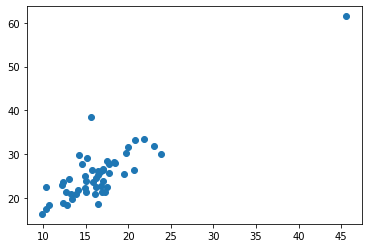

In [18]:
scatter(below_p_18_to_35, no_hs_pct)

## below poverty vs hs grads

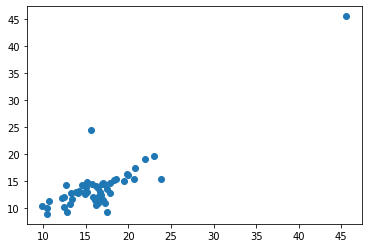

In [19]:
scatter(below_p_18_to_35, hs_grads_pct)

## below poverty vs some college

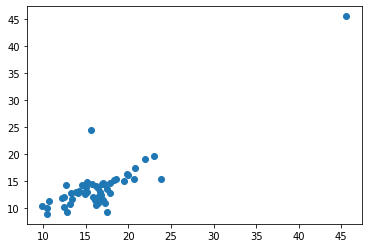

In [21]:
scatter(below_p_18_to_35, some_college_pct)